In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# linux command to changes directory
%cd "/content/gdrive/MyDrive/Coding/Afnan/Data Preprocessing"

/content/gdrive/MyDrive/Coding/Afnan/Data Preprocessing


In [3]:
# linux command to list files in current directory
!ls

 data.csv  'Processing Code'


## Importing Libraries

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# text preprocessing lib
import nltk
nltk.download('stopwords')
import string
import re

from nltk.stem.isri import ISRIStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [344]:
# reading dataset using pandas as dataFrame
data = pd.read_csv('data.csv')
# fetch first 5 rows in our data
data.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Compartive,EN1,EN2,Sentiment,PreferedEntity
0,0,2023-01-20 19:45:33+00:00,1.616520e+18,يقولك تطبيقات ابل افضل من سامسونغ اعرف انه دفي...,com,ابل,سامسونغ,n,سامسونغ
1,1,2023-01-16 19:57:29+00:00,1.615080e+18,@kndodty @Ulavcke_ معليش لازم نكون نفسك ولا نص...,com,نظام ابل,اندرويد,p,نظام ابل
2,2,2023-01-16 18:01:02+00:00,1.615050e+18,@Ulavcke_ @kndodty تر ابل افضل من شركات الجولا...,com,ابل,NaN,p,ابل
3,3,2023-01-13 01:37:32+00:00,1.613710e+18,@CelebsArabic من وجهة نظري آبل أفضل من ناحية ا...,com,ابل,اندرويد,p,ابل
4,5,2022-12-20 07:48:33+00:00,1.605110e+18,@kzw66 @iPaimon @qatnology مادام فيه جهاز متصل...,com,ابل,NaN,p,ابل


In [345]:
# display data columns
data.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Compartive', 'EN1',
       'EN2', 'Sentiment', 'PreferedEntity'],
      dtype='object')

In [346]:
# we will work in text column and compartive column so let's get red of other columns
data = data[['Text','Compartive']]
data.head()

,Text,Compartive
0,يقولك تطبيقات ابل افضل من سامسونغ اعرف انه دفي...,com
1,@kndodty @Ulavcke_ معليش لازم نكون نفسك ولا نص...,com
2,@Ulavcke_ @kndodty تر ابل افضل من شركات الجولا...,com
3,@CelebsArabic من وجهة نظري آبل أفضل من ناحية ا...,com
4,@kzw66 @iPaimon @qatnology مادام فيه جهاز متصل...,com


In [347]:
print(f"There are {data.shape[0]} Rows")

There are 564 Rows


In [348]:
# value_counts is used to display how many time the each category has appear in specific column
data['Compartive'].value_counts()

com    488
non     76
Name: Compartive, dtype: int64

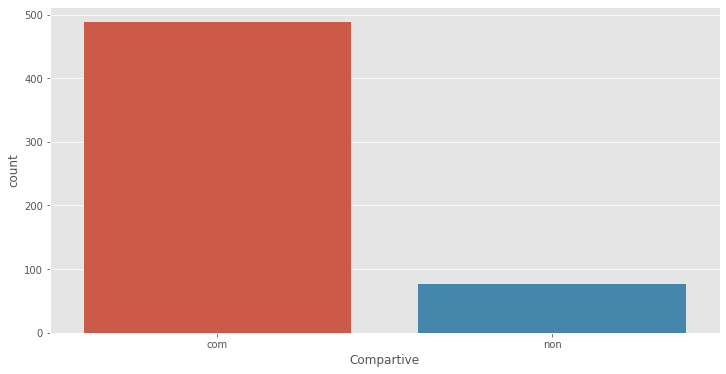

In [349]:
# define figure size
plt.figure(figsize=(12,6))
# countplot is used to display how many time the each category has appear in specific column
sns.countplot(data=data , x='Compartive')
plt.show()

In [350]:
## checking null values 
data.isnull().sum()

Text          0
Compartive    0
dtype: int64

In [351]:
# convert target column into binary encoding 
# com convert to 1 , non = 0
data['Compartive'] = data['Compartive'].apply(lambda x : 1 if x == "com" else 0)
# ensure than columns type is int
data['Compartive'] = data['Compartive'].astype(int)

In [352]:
# define a function to get random samples of text

def get_random_text():

  # randint is used to get a random number between low = 0,high = 500
  random_num = np.random.randint(0,500)
  # iloc is used to get item by its index in pandas data frame
  sample = data.iloc[random_num]
  # f allows us to put variables in {} inside of the text
  print(f'Label is {"Compartive" if sample["Compartive"] == 1 else "None"} Text is \n {sample["Text"]}')

In [353]:
get_random_text()

Label is Compartive Text is 
 @aa_1a 

نصحيه ايفون 6 بلس 

بطاريته ممتازه 
شاشته حلوه وكبيره
ابل افضل من الاندرويد


In [354]:
get_random_text()

Label is Compartive Text is 
 @FCBinsider شكو هاذا يصير بعد سنتين ونص ٣ سنين وشركه ابل افضل من سامسونج الي عمر تلفوناتهم سنه او سنه ونص ويعلق


In [355]:
get_random_text()

Label is Compartive Text is 
 @_xOrcax الموضوع نسبي على حسب رؤيتك لاستخدامها ، سوق آبل أفضل من الأسواق التانية في تطبيقات الساعات الذكية ، التكامل مع الهاتف أفضل ، وفي السعر ديما منتجات آبل مبالغ في سعرها على كل الأصعدة فالساعات مش حيكونو استثناء


In [356]:
get_random_text()

Label is Compartive Text is 
 حماس مؤتمر ابل افضل من حماس مؤتمر سامسونج بكثير


## Preprocessing


*   Remove Punctuations
*   Remove Digits
* Remove Hashtags and Mentions
* Remove StopWords
* Links
* Arabic Diacritics
* Normailize Arablic
* stemming 




In [357]:
# text sample to check the following fuctions with
text_sample = """
 @OTAKU_79 
بـ رآيي ..  :(
اشوف انو آبل افضل من سامسونج و سوني !
🤣 https://t.co/U5czLdbceP
"""

## Punctuations

### tutorial :: https://datagy.io/python-remove-punctuation-from-string/

In [358]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
# len is a built in function used for getting
# the length of letters in string and items in a list
len(arabic_punctuations)

36

In [359]:
def remove_punctuations(text):

  text = text.translate(str.maketrans("","",arabic_punctuations))
  return text

In [360]:
print(remove_punctuations(text_sample))


 @OTAKU79 
ب رآيي   
اشوف انو آبل افضل من سامسونج و سوني 
🤣 httpstcoU5czLdbceP



### Digits

In [361]:
digits = string.digits
digits

'0123456789'

In [362]:
def remove_digits(text):
  text = text.translate(str.maketrans("","",digits))
  return text

In [363]:
print(remove_digits(text_sample))


 @OTAKU_ 
بـ رآيي ..  :(
اشوف انو آبل افضل من سامسونج و سوني !
🤣 https://t.co/UczLdbceP



### Remove Links

In [364]:
def remove_links(text):
  # regular expression is a NLP techinque to handle text using specific pattern 
  text = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)","",text)
  return text

In [365]:
print(remove_links(text_sample))


 @OTAKU_79 
بـ رآيي ..  :(
اشوف انو آبل افضل من سامسونج و سوني !
🤣 



### Remove Hashtags and Mentions

In [366]:
def remove_hashtags_mentions(text):
  # [\w]+ one or more than character
  # the overall meaning is @ then some letters
  text = re.sub(r"@[\w]+","",text)
  text = re.sub(r"#[\w]+","",text)
  return text

In [367]:
print(remove_hashtags_mentions("@hasteryablog آبل افضل من سامسونج	"))

 آبل افضل من سامسونج	


### Emoji

In [368]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)


In [369]:
def remove_emoji(text):
  text = emoji_pattern.sub(r'',text)
  return text

In [370]:
print(remove_emoji(text_sample)) 


 @OTAKU_79 
بـ رآيي ..  :(
اشوف انو آبل افضل من سامسونج و سوني !
 https://t.co/U5czLdbceP



In [371]:
pattern_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [372]:
def remove_diacritics(text):
  text = re.sub(pattern_diacritics,"",text)
  return text

In [373]:
text = "الْيَوْمُ الخَامِسُ مِنَ الأُسْبُوعِ يَأْتِي بَعْدَ يَوْمِ الأَرْبِعَاءِ، وَيَلِيهِ يَوْمُ الجُمُعَةِ."
print(remove_diacritics(text))

اليوم الخامس من الأسبوع يأتي بعد يوم الأربعاء، ويليه يوم الجمعة.


In [374]:
def normalize_arabic(text):
  text = re.sub("[إأآا]", "ا",text)
  text = re.sub("ى", "ي", text)
  text = re.sub("ؤ", "ء", text)
  text = re.sub("ئ", "ء", text)
  text = re.sub("ة", "ه", text)
  text = re.sub("گ", "ك", text)
  return text

### StopWords

In [375]:
stop_word_comp = ["،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"]
len(stop_word_comp)

481

In [376]:
def remove_stop(text):
  # loop over the word in text add the word into text if that word not in stopWords
  # this technique is called list comprehension
  words = [word for word in text.split() if word not in stop_word_comp]
  # join the words in the list and add " " before each item 
  text = " ".join(words)
  return text

In [377]:
print(remove_stop("وهو الذي قال ان ابل افضل من سامسونج"))

ابل افضل سامسونج


## Stemmer

Stemming to remove suffixes from words and end up with a so-called word stem. The words “likes”, “likely” and “liked”, for example, all result in their common word stem “like” which can be used as a synonym for all three words

In [378]:
stemmer = ISRIStemmer()

def stem_text(text):
  text = stemmer.stem(text)
  return text

In [379]:
%%time
print(stem_text(' يعني يسون تحديث ليرنامجه هذي سلبيهمثل ماهو ناس تطور ناس تشتغل الاختراق انتم ليه تتفهمون نقطه محد يقول ابل كامله الي نقول نظام ابل افضل اندرويد '))

 يعني يسون تحديث ليرنامجه هذي سلبيهمثل ماهو ناس تطور ناس تشتغل الاختراق انتم ليه تتفهمون نقطه محد يقول ابل كامله الي نقول نظام ابل افضل اندرويد 
CPU times: user 1.19 ms, sys: 802 µs, total: 2 ms
Wall time: 2.04 ms


## gather All Functions into a one function

In [380]:
def text_preprocessing(text):
  text = text.replace("،"," ")
  text = remove_stop(text)
  text = remove_links(text)
  text = remove_hashtags_mentions(text)
  text = remove_digits(text)
  text = remove_punctuations(text)
  text = remove_emoji(text)
  text = remove_diacritics(text)
  text = normalize_arabic(text)
  text = stem_text(text)
  return text

In [381]:
print(text_preprocessing(text_sample))

 ب رايي   اشوف انو ابل افضل سامسونج سوني   


In [382]:
%%time
# apply text processing function to text column and put the output into text column
data['Text'] = data['Text'].apply(text_preprocessing)

CPU times: user 122 ms, sys: 123 µs, total: 122 ms
Wall time: 122 ms


In [383]:
for i in range(50):
  get_random_text()
  print("\n")

Label is Compartive Text is 
 ادري ليه الناس مكمله النظام الاستبدادي للشركات التجاريه انا شخص انك تتخذ موقف لوي الذراع لنفسك فقط عشان محول ايفون لهواوي اني اعترف اعتراف تام نظام ابل افضل اندرويد بمراحل


Label is Compartive Text is 
  بغض النظر السرعه العلام نظام ال ios ابل افضل الايندرويد


Label is Compartive Text is 
  ابل افضل الشركات احسن شي النظام المتجر تطبيقاته كثير مافيها فايروسات الاندرويد 


Label is Compartive Text is 
 اعلان سماعه ابل افضل ازعاج اعلانات جوالات وساعات الناس 


Label is Compartive Text is 
    انت صجك  منصه ابل افضل نتفلكس  انا اسف اني اناقشك 


Label is Compartive Text is 
  بلاش فلسفه فاضيه خودي جهاز علي قصاد ميزانيتك ابل افضل متاهات الثانيه 


Label is Compartive Text is 
    قصدك مميزات ساعه ابل افضل ساعه سامسونج صح لان نتفق بس قصدك هواتف وغيره  بيكون مشكله


Label is Compartive Text is 
  ابل افضل سامسونج


Label is Compartive Text is 
  تبي تقنعني سماعه ابل افضل h ههههههههههه


Label is Compartive Text is 
  المقصد انو ابل افضل الشركات الاخري ناحيه شي 

In [384]:
# getting how many words in text
# this way is lambda function : get the value of row and put it in x then apply process in X
data['word_len'] = data['Text'].apply(lambda x:len(x.split()))

In [385]:
# display statistical informations :
  # count : the number of values
  # std stands for standard deviation
  # min : minmum text row has mon word
  # 25% also known as first quartile means the 25% of texts has less than 8 words
  # 30% also known as Median cuts the dataset in half and means the 50% of texts has less than 8 words
data['word_len'].describe()

count    564.000000
mean      14.838652
std        9.751651
min        2.000000
25%        8.000000
50%       12.000000
75%       18.000000
max       49.000000
Name: word_len, dtype: float64

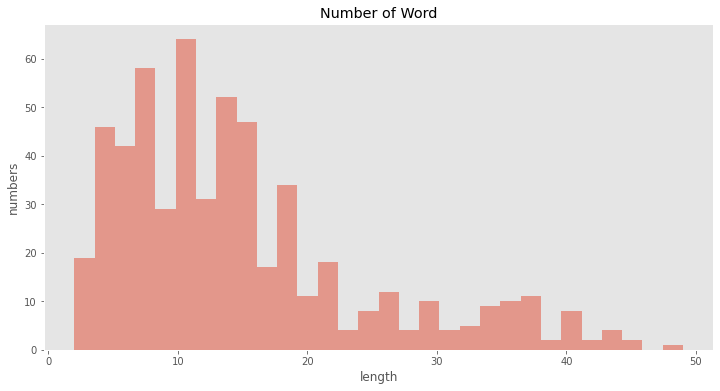

In [386]:
plt.figure(figsize=(12,6))
plt.hist(data['word_len'],alpha = 0.5,bins=30)
plt.title('Number of Word')
plt.xlabel('length')
plt.ylabel('numbers')
plt.grid()
plt.show()


## as you can see most of texts has words between 5 and 35 or 40 , so we can choose max len of input is 35 

In [387]:
# save processed data into csv
# .. means back one directory 
data.to_csv('../Models/preprocessed.csv')